# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing 
from sklearn.linear_model import LassoCV
from sklearn import datasets 
from sklearn import model_selection 
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B_Xialei_Gao/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.loc[df["sex"]== "female","sex"] = 1
df.loc[df["sex"]== "male","sex"] = 0

In [ ]:
df.loc[df["smoker"]== "yes","smoker"] = 1
df.loc[df["smoker"]== "no","smoker"] = 0

In [ ]:
df.loc[df["region"] == "southwest","region"] = 1
df.loc[df["region"] == "northwest","region"] = 2
df.loc[df["region"] == "northeast","region"] = 3
df.loc[df["region"] == "southeast","region"] = 4

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,4,1725.55230
2,28,0,33.000,3,0,4,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,4,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [ ]:
df['southwest'] = np.where(df['region'] == 1, 1,0)
df['northwest'] = np.where(df['region'] == 2, 1,0)
df['southeast'] = np.where(df['region'] == 3, 1,0)
df = df.drop('region', axis=1)
df

,age,sex,bmi,children,smoker,charges,southwest,northwest,southeast
0,19,1,27.900,0,1,16884.92400,1,0,0
1,18,0,33.770,1,0,1725.55230,0,0,0
2,28,0,33.000,3,0,4449.46200,0,0,0
3,33,0,22.705,0,0,21984.47061,0,1,0
4,32,0,28.880,0,0,3866.85520,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0
1334,18,1,31.920,0,0,2205.98080,0,0,1
1335,18,1,36.850,0,0,1629.83350,0,0,0
1336,21,1,25.800,0,0,2007.94500,1,0,0


In [ ]:
df = df.reindex(['age','sex','bmi','children','smoker','southwest','northwest','southeast','charges'], axis=1)
df

,age,sex,bmi,children,smoker,southwest,northwest,southeast,charges
0,19,1,27.900,0,1,1,0,0,16884.92400
1,18,0,33.770,1,0,0,0,0,1725.55230
2,28,0,33.000,3,0,0,0,0,4449.46200
3,33,0,22.705,0,0,0,1,0,21984.47061
4,32,0,28.880,0,0,0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,10600.54830
1334,18,1,31.920,0,0,0,0,1,2205.98080
1335,18,1,36.850,0,0,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,0,0,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [ ]:
cut = int((len(df) * 0.8) //1 )
cut

1070

In [ ]:
data = np.array(df.iloc[:,:9])
target = np.array(df.iloc[:,-1])

In [ ]:
x_set = df[['age','sex','bmi','children','smoker','southwest','northwest','southeast']]

In [ ]:
in_data = x_set[:cut]
out_data = x_set[cut:]
in_target = df["charges"][:cut]
out_target = df["charges"][cut:]

# 3.) Normalize the Data

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)

In [ ]:
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

In [ ]:
in_data

,age,sex,bmi,children,smoker,southwest,northwest,southeast
0,19,1,27.900,0,1,1,0,0
1,18,0,33.770,1,0,0,0,0
2,28,0,33.000,3,0,0,0,0
3,33,0,22.705,0,0,0,1,0
4,32,0,28.880,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1065,42,1,25.300,1,0,1,0,0
1066,48,0,37.290,2,0,0,0,0
1067,39,0,42.655,0,0,0,0,1
1068,63,0,21.660,1,0,0,1,0


In [ ]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, ...,  1.76504522,
        -0.55791981, -0.56943606],
       [-1.52464584, -0.97964634,  0.4911621 , ..., -0.56655772,
        -0.55791981, -0.56943606],
       [-0.81719959, -0.97964634,  0.36455128, ..., -0.56655772,
        -0.55791981, -0.56943606],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, ..., -0.56655772,
        -0.55791981,  1.75612342],
       [ 1.65886228, -0.97964634, -1.50008089, ..., -0.56655772,
         1.79237229, -0.56943606],
       [ 1.02216066,  1.02077653,  0.18367867, ..., -0.56655772,
        -0.55791981, -0.56943606]])

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [ ]:
a = modCV.alpha_ #OPtimized Lambda 

In [ ]:
a

94.07494234973737

# 5.) Run a lambda regression with that Lambda

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn. linear_model import Lasso

In [ ]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)

In [ ]:
mod1.predict(np.array(in_data_scale))

array([25014.8879334 ,  3755.74415007,  6785.29792461, ...,
       12255.93675841, 11581.80893732, 12358.56265007])

In [ ]:
coef = mod1.coef_

# 6.) Visualize the coefficients 

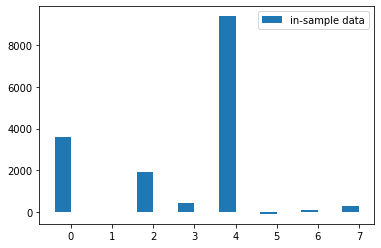

In [ ]:
x = ['b0','b1','b2','b3','b4','b5','b6','b7']
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, coef, 0.4, label = 'in-sample data')
plt.legend()
plt.show()

# 7.) Interpret the coefficients

In [ ]:
#According to the graph above, we ended up to the conclude that Region and Sex have limited effect over charges 

# 8.) Compare in and out of sample MSE’s

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
in_pred = mod1.predict(in_data_scale)
out_pred = mod1.predict(out_data_scale)

In [ ]:
in_mse = mse(in_pred, in_target)
out_mse = mse(out_pred, out_target)
print(in_mse)
print(out_mse)

36452750.171510026
37184964.26385617


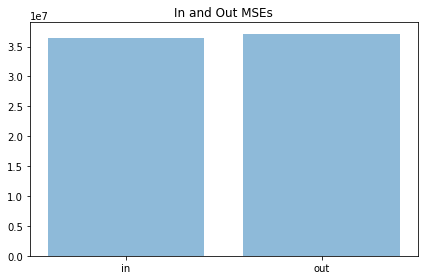

In [ ]:
plt.bar(["in","out"], [in_mse, out_mse], alpha = 0.5)
plt.title("In and Out MSEs")
plt.tight_layout()
plt.show()